In [1]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


爬蟲

In [2]:
from bs4 import BeautifulSoup as bs
import json
import requests

In [5]:
def Data(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data = json.loads(data_string)
    Type.append(data['type'])
    name.append(data['show_name'])
    date.append(data['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/show/audience_analysis/id/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data1 = json.loads(data_string)
    male.append(data1['data']['sex']['baidu']['M'])
    female.append(data1['data']['sex']['baidu']['F'])
    age.append(data1['data']['age']['baidu']['first']['rank_desc'])
    age1.append(data1['data']['age']['baidu']['second']['rank_desc'])

    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data2 = json.loads(data_string)
    score.append(data2['score'])

裝進list

In [6]:
name = []
Type = []
date = []
male = []
female = []
age = []
age1 = []
score = []

b2019 = [4783,13382,13380,12707,17909,13388,13653,17557,11886,12944,13309,17283,16443,16201,16244,16942,14437,18201,13342,17566,
         14071,14025,14628,13038,14036,13141,11885,14074,17585,12673,14416,16980,14077,13437,16093,14302,16992,14647,14441,16182,
         17774,17764,13146,13433,13983,13515,14576,14293,16984,11934]
for i in range(49):
    Data(b2019[i])

data2019
dataframe含'劇名''題材''日期''男(%)''女(%)''年齡第一多''年齡第二多''豆瓣評分'

In [7]:
import pandas as pd
data2019 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,
                         '女(%)':female,'年齡0':age,'年齡1':age1,'豆瓣評分':score})

In [8]:
data2019['男(%)'] = data2019['男(%)'].str.replace('%', '')
data2019['女(%)'] = data2019['女(%)'].str.replace('%', '')
data2019['年齡0'] = data2019['年齡0'].str.replace('岁', '')
data2019['年齡1'] = data2019['年齡1'].str.replace('岁', '')
data2019['題材'] = data2019['題材'].str.replace('/', '')

In [9]:
data2019

,劇名,題材,日期,男(%),女(%),年齡0,年齡1,豆瓣評分
0,庆余年,权谋古代,2019-11-26,60.6,39.4,19-24,25-34,7.9
1,陈情令,古代权谋仙侠,2019-06-27,17.34,82.66,25-34,19-24,7.7
2,锦衣之下,古代爱情言情,2019-12-28,15.09,84.91,25-34,19-24,7.5
3,鹤唳华亭,古代权谋,2019-11-11,20.75,79.25,19-24,25-34,7.1
4,梦回,古代爱情言情穿越,2019-12-14,26.1,73.9,19-24,25-34,3.6
5,剑王朝,古代权谋,2019-12-06,74.14,25.86,19-24,25-34,6.4
6,心灵法医,现代悬疑推理,2019-11-18,41.52,58.48,25-34,19-24,5.3
7,惹不起的殿下大人,古代爱情言情,2019-12-07,16.02,83.98,19-24,25-34,6.0
8,长安十二时辰,悬疑古代历史,2019-06-27,52.57,47.43,19-24,25-34,8.1
9,全职高手,现代励志,2019-07-24,61,39,25-34,35-49,7.3


題材與性別

dataframe1
dataframe含'劇名''題材''日期''男(%)''女(%)'

In [10]:
dataframe1 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,'女(%)':female})

In [11]:
dataframe1['男(%)'] = dataframe1['男(%)'].str.replace('%', '')
dataframe1['女(%)'] = dataframe1['女(%)'].str.replace('%', '')
dataframe1['題材'] = dataframe1['題材'].str.replace('/', '')

In [12]:
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古代.*权谋.*', '古代权谋', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*玄幻.*', '玄幻', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*仙侠.*', '仙侠', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古代.*爱情.*', '古代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*爱情.*', '现代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*都市.*', '现代都市', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*抗战.*', '抗战', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*悬疑.*', '现代悬疑', regex=True)

In [13]:
dataframe1['題材'][0] = '古代权谋'

In [14]:
dataframe1

,劇名,題材,日期,男(%),女(%)
0,庆余年,古代权谋,2019-11-26,60.6,39.4
1,陈情令,古代权谋,2019-06-27,17.34,82.66
2,锦衣之下,古代爱情,2019-12-28,15.09,84.91
3,鹤唳华亭,古代权谋,2019-11-11,20.75,79.25
4,梦回,古代爱情,2019-12-14,26.1,73.9
5,剑王朝,古代权谋,2019-12-06,74.14,25.86
6,心灵法医,现代悬疑,2019-11-18,41.52,58.48
7,惹不起的殿下大人,古代爱情,2019-12-07,16.02,83.98
8,长安十二时辰,悬疑古代历史,2019-06-27,52.57,47.43
9,全职高手,现代励志,2019-07-24,61,39


以題材做男女比例對照表格
data_grouped
dataframe含'題材''男(%)''女(%)'

In [15]:
dataframe1['男(%)'] = dataframe1['男(%)'].astype(float)
dataframe1['女(%)'] = dataframe1['女(%)'].astype(float)

In [16]:
data_grouped = dataframe1.groupby('題材')[['男(%)', '女(%)']].mean().reset_index()

In [17]:
data_grouped

,題材,男(%),女(%)
0,人物传奇民国励志,57.030000,42.970000
1,刑侦罪案国共内战,69.790000,30.210000
2,古代历史,73.380000,26.620000
3,古代权谋,43.207500,56.792500
4,古代爱情,17.316667,82.683333
5,悬疑古代历史,52.570000,47.430000
6,抗战,50.456667,49.543333
7,爱情言情60到90年代,50.700000,49.300000
8,玄幻,39.325000,60.675000
9,现代励志,61.000000,39.000000


以題材做男女比例對照長條圖

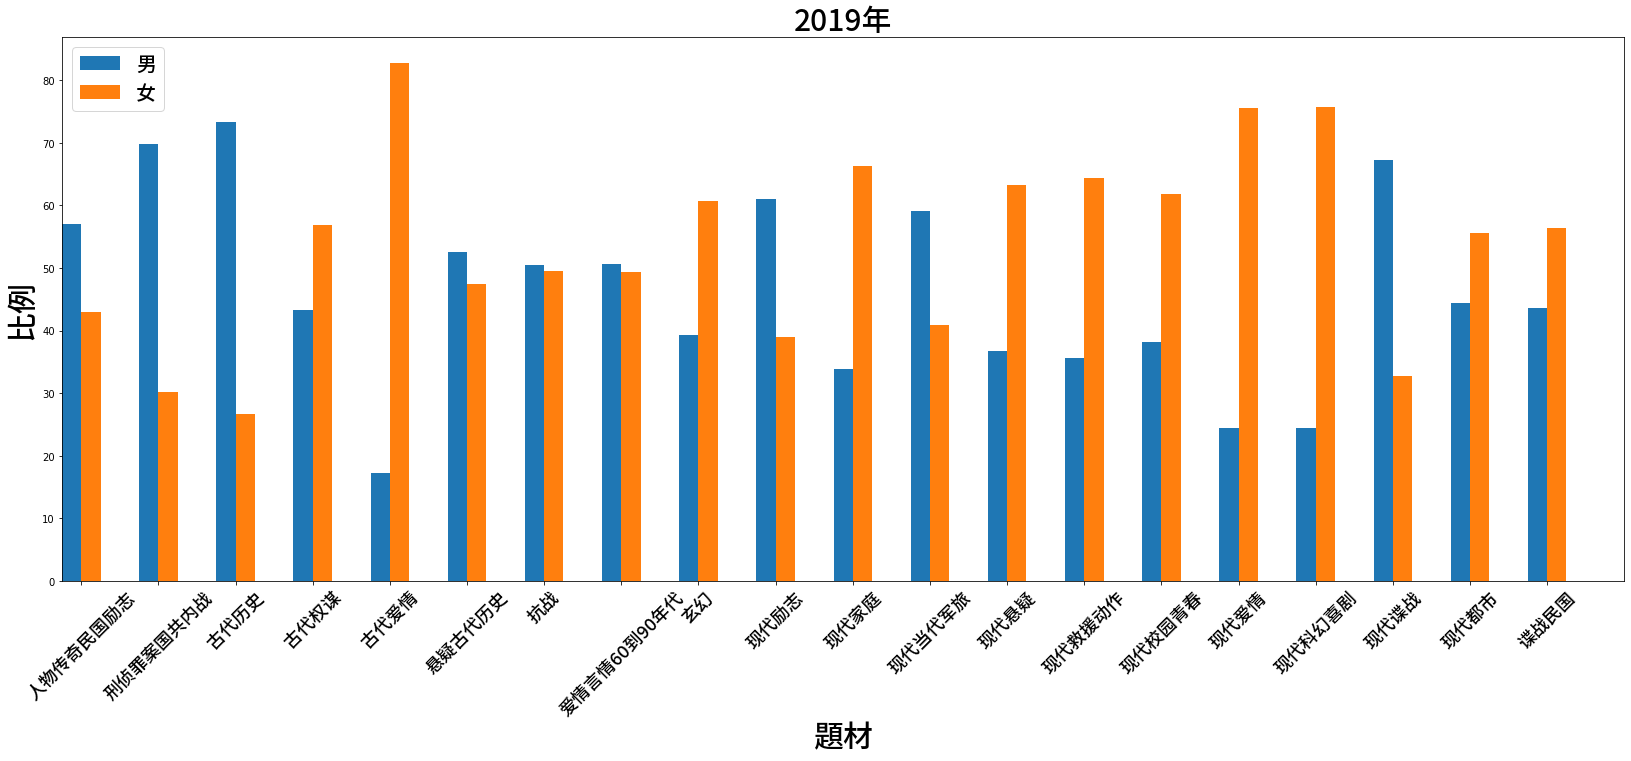

In [18]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别和偏移量
x = data_grouped['題材']
bar_width = 0.25
index = range(len(x))
offset = bar_width / 2

# 绘制男生的条形图
plt.bar([i - offset for i in index], data_grouped['男(%)'], bar_width, label='男')
plt.xlim(-bar_width, len(x)) 
# 绘制女生的条形图
plt.bar([i + offset for i in index], data_grouped['女(%)'], bar_width, label='女')

plt.xticks(index, x, fontproperties=font1, fontsize=18, rotation=45)

plt.title('2019年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=20))
plt.show()


題材與年齡

dataframe
dataframe含'劇名''題材''日期''集數''年齡第一多''年齡第二多'

In [19]:
dataframe = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'年齡0':age,'年齡1':age1})
dataframe['題材'] = dataframe['題材'].str.replace('/', '')
dataframe['年齡0'] = dataframe['年齡0'].str.replace('岁', '')
dataframe['年齡1'] = dataframe['年齡1'].str.replace('岁', '')

In [20]:
dataframe['題材'] = dataframe['題材'].str.replace('.*古代.*权谋.*', '古代权谋', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*玄幻.*', '玄幻', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*仙侠.*', '仙侠', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古代.*爱情.*', '古代爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*爱情.*', '现代爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*都市.*', '现代都市', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*抗战.*', '抗战', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*悬疑.*', '现代悬疑', regex=True)
dataframe['題材'][0] = '古代权谋'

In [21]:
dataframe

,劇名,題材,日期,年齡0,年齡1
0,庆余年,古代权谋,2019-11-26,19-24,25-34
1,陈情令,古代权谋,2019-06-27,25-34,19-24
2,锦衣之下,古代爱情,2019-12-28,25-34,19-24
3,鹤唳华亭,古代权谋,2019-11-11,19-24,25-34
4,梦回,古代爱情,2019-12-14,19-24,25-34
5,剑王朝,古代权谋,2019-12-06,19-24,25-34
6,心灵法医,现代悬疑,2019-11-18,25-34,19-24
7,惹不起的殿下大人,古代爱情,2019-12-07,19-24,25-34
8,长安十二时辰,悬疑古代历史,2019-06-27,19-24,25-34
9,全职高手,现代励志,2019-07-24,25-34,35-49


In [22]:
# 计算不同年龄段的数量
count_grouped = dataframe.groupby(['題材', '年齡0']).size().unstack().reset_index()

# 补零处理
age_groups = ['19-24', '25-34']
for age_group in age_groups:
    if age_group not in count_grouped.columns:
        count_grouped[age_group] = 0
    count_grouped[age_group].fillna(0, inplace=True)

In [44]:
count_grouped['19-24'] = count_grouped['19-24'].astype(float)
count_grouped['25-34'] = count_grouped['25-34'].astype(float)
count_grouped['19-24'] = count_grouped['19-24'] + 3
count_grouped['25-34'] = count_grouped['25-34'] + 3

In [45]:
count_grouped

年齡0,題材,19-24,25-34
0,人物传奇民国励志,4.0,3.0
1,刑侦罪案国共内战,3.0,4.0
2,古代历史,4.0,3.0
3,古代权谋,6.0,4.0
4,古代爱情,7.0,5.0
5,悬疑古代历史,4.0,3.0
6,抗战,5.0,4.0
7,爱情言情60到90年代,3.0,4.0
8,玄幻,5.0,3.0
9,现代励志,3.0,4.0


以題材做年齡(19-24/25-34)比例對照長條圖

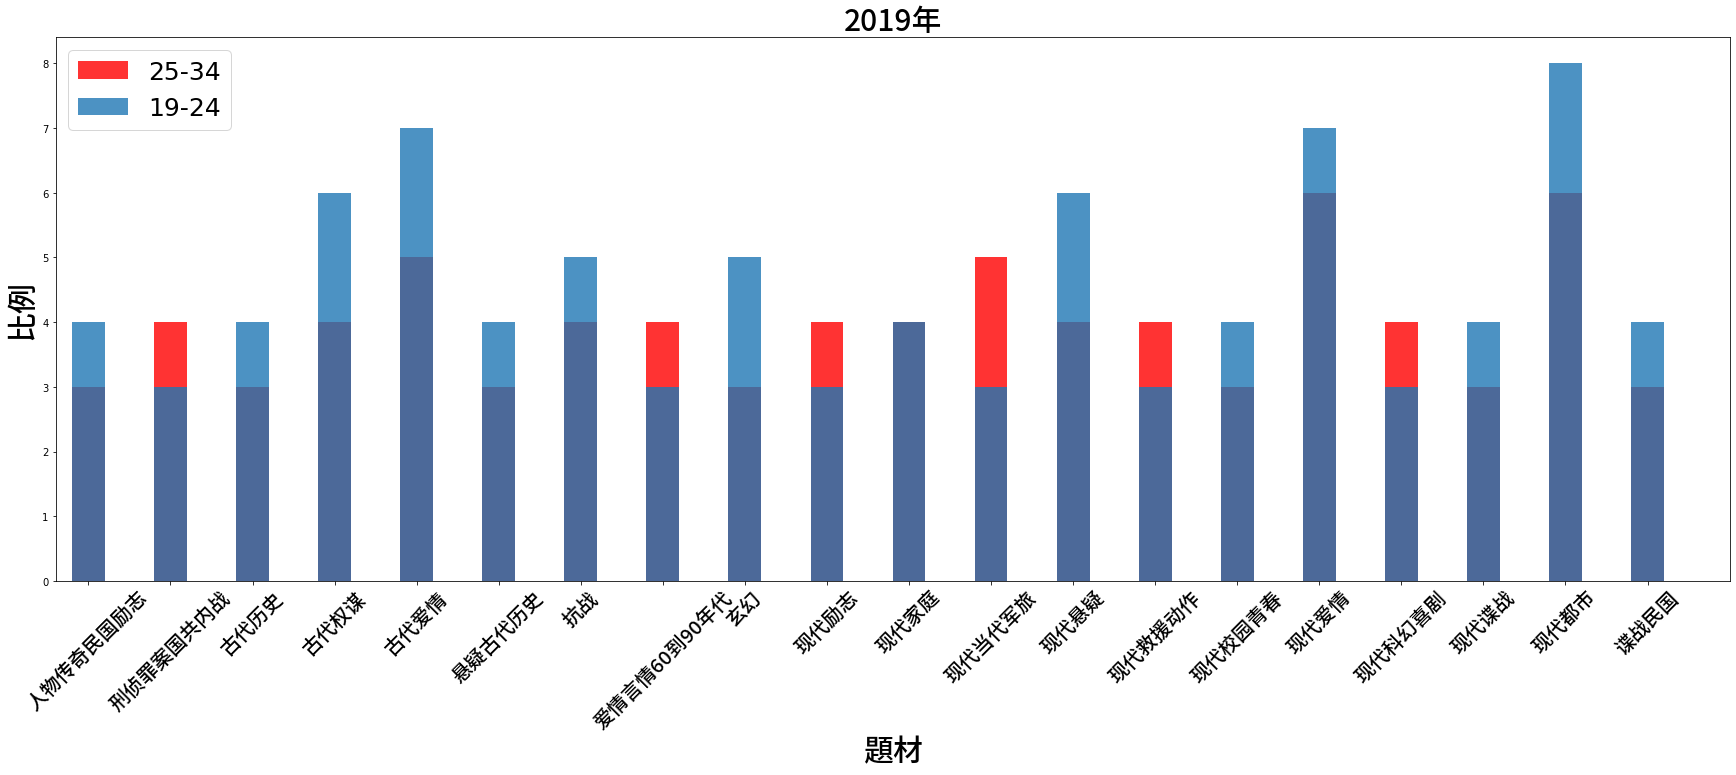

In [73]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(30, 10))

# 设置 x 轴类别
x = count_grouped['題材']

# 设置两个柱子的位置
bar_width = 0.4
index = range(len(x))

plt.bar(index, count_grouped['19-24'],  bar_width, label='19-24',alpha = 0.8)
plt.bar(index, count_grouped['25-34'], bar_width, label='25-34',color='red',alpha = 0.8)

plt.xlim(-bar_width, len(x))  # 将x轴范围向左偏移一个柱子的宽度
plt.xticks([i for i in index], x, fontproperties=font1, ha='center', fontsize=20, rotation=45)

plt.title('2019年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop={'size': 25})
plt.show()

題材與評分

In [27]:
def Data1(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data4 = json.loads(data_string)
    Type1.append(data4['type'])
    Name.append(data4['show_name'])
    Date.append(data4['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data3 = json.loads(data_string)
    Score.append(data3['score'])

In [28]:
Name = []
Type1 = []
Date = []
Score = []
a2019 = [14705,17809,12289,14334,11886,13382,13985,15107,13141,11934,16984,11884,4783,12946,16092,
        13437,12559,13899,16189,17205,11883,17390,17253,18201,11897,11885]

a2019_set = set(a2019)
b2019_set = set(b2019)
union_set = a2019_set.union(b2019_set)
union_list = list(union_set)

for i in range(67):
    Data1(union_list[i])

In [29]:
import pandas as pd
Data2019 = pd.DataFrame({'劇名':Name,'題材':Type1,'日期':Date,'豆瓣評分':Score})
Data2019['題材'] = Data2019['題材'].str.replace('/', '')
Data2019

,劇名,題材,日期,豆瓣評分
0,大江大河,革命历史60到90年代,2018-12-10,8.8
1,你的未来已签收,现代玄幻奇幻,2019-07-30,8.0
2,戏隐江湖,现代玄幻奇幻喜剧,2018-12-12,7.6
3,闪光少女,现代校园青春,2019-12-16,7.5
4,破冰行动,现代悬疑推理剿匪,2019-05-07,6.8
...,...,...,...,...
62,梦回,古代爱情言情穿越,2019-12-14,3.6
63,精英律师,现代都市,2019-12-20,5.3
64,在远方,现代都市创业,2019-09-22,6.5
65,少年派,现代都市,2019-06-09,6.5


In [30]:
Data2019['題材'] = Data2019['題材'].str.replace('.*古代.*权谋.*', '古代权谋', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*权谋古代.*', '古代权谋', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*玄幻.*', '玄幻', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*仙侠.*', '仙侠', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古代.*爱情.*', '古代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*爱情.*', '现代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*都市.*', '现代都市', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*抗战.*', '抗战', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*悬疑.*', '现代悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*建国前后.*', '建国前后', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*60到90年代.*', '60到90年代', regex=True)
Data2019['題材'][3]='现代校园'
Data2019

C:\Users\User\AppData\Local\Temp\ipykernel_15412\3245265654.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][3]='现代校园'


,劇名,題材,日期,豆瓣評分
0,大江大河,60到90年代,2018-12-10,8.8
1,你的未来已签收,玄幻,2019-07-30,8.0
2,戏隐江湖,玄幻,2018-12-12,7.6
3,闪光少女,现代校园,2019-12-16,7.5
4,破冰行动,现代悬疑,2019-05-07,6.8
...,...,...,...,...
62,梦回,古代爱情,2019-12-14,3.6
63,精英律师,现代都市,2019-12-20,5.3
64,在远方,现代都市,2019-09-22,6.5
65,少年派,现代都市,2019-06-09,6.5


In [31]:
Data2019['豆瓣評分'] = Data2019['豆瓣評分'].astype(float)
data_grouped2 = Data2019.groupby('題材')['豆瓣評分'].mean().reset_index()
data_grouped2

,題材,豆瓣評分
0,60到90年代,7.666667
1,人物传奇民国励志,6.600000
2,刑侦罪案国共内战,6.800000
3,古代历史,6.000000
4,古代悬疑推理,7.800000
5,古代权谋,7.275000
6,古代爱情,6.328571
7,建国前后,7.300000
8,悬疑古代历史,8.100000
9,抗战,7.440000


In [32]:
data_grouped2['豆瓣評分'][18]=5.6

C:\Users\User\AppData\Local\Temp\ipykernel_15412\3855625040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_grouped2['豆瓣評分'][18]=5.6


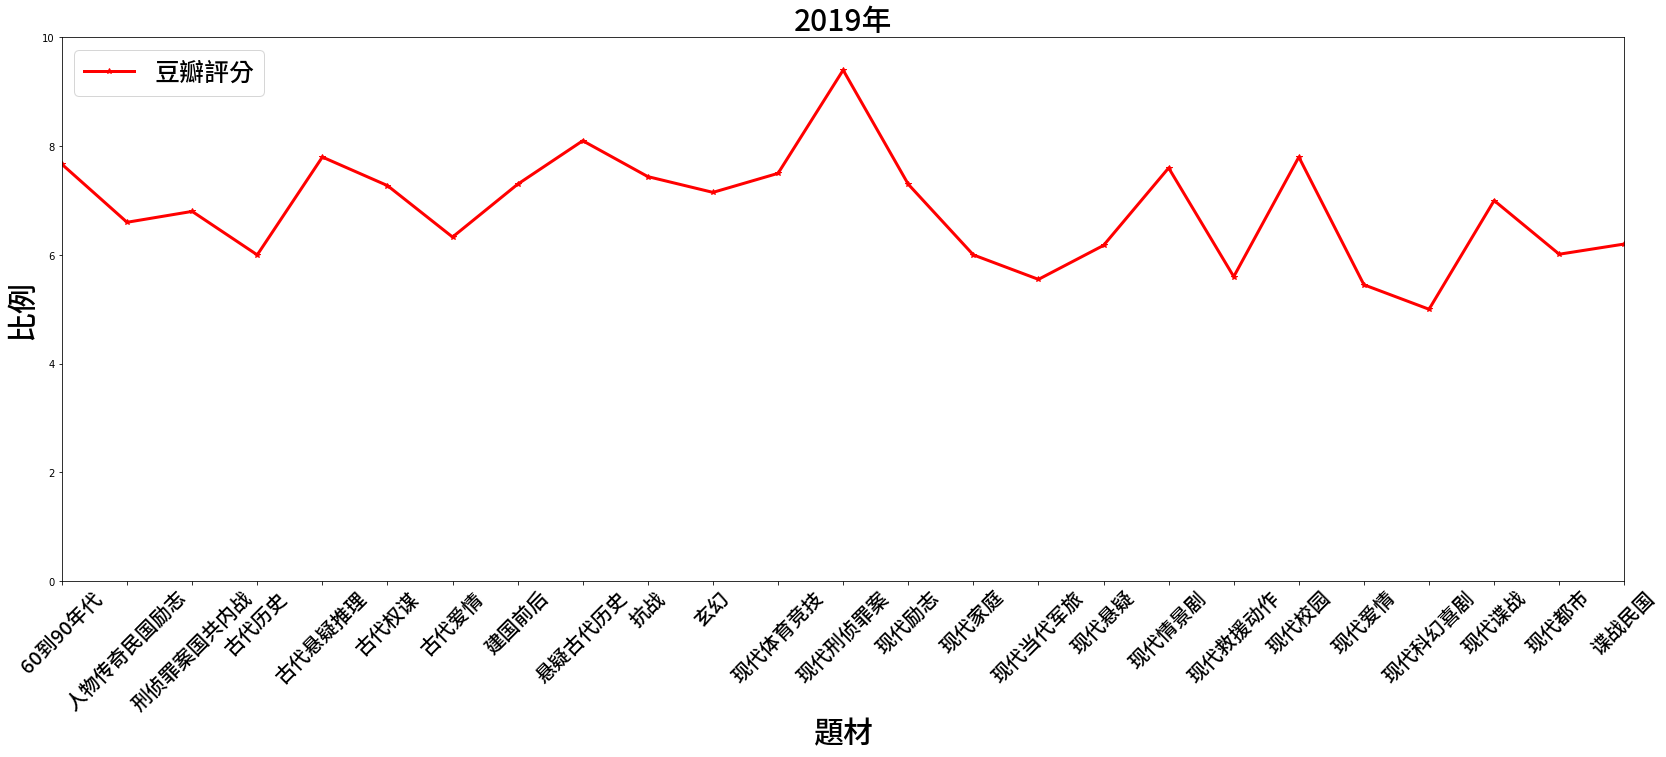

In [74]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别
x = data_grouped2['題材']

index = range(len(x))

plt.plot(index, data_grouped2['豆瓣評分'], marker='*', c='r', label='豆瓣評分', linewidth=3)

plt.xlim(0, len(x) - 1)  # 調整x軸範圍，從最左側的數據點開始
plt.ylim(0, 10)
plt.xticks(index, x, fontproperties=font1, ha='center', fontsize=20, rotation=45)

plt.title('2019年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=25), fontsize=50)
plt.show()
